# 🧪 Workshop - Visual Filtering with Custom Convolution Kernels

### 🎯 Objective
Design and implement custom image filters to enhance, blur, or detect features using manual 2D convolution. This workshop deepens understanding of convolution and its visual impact in image processing.

## 📦 Install Required Libraries

In [1]:
!pip install opencv-python numpy matplotlib

## 🖼 Load Image in Grayscale

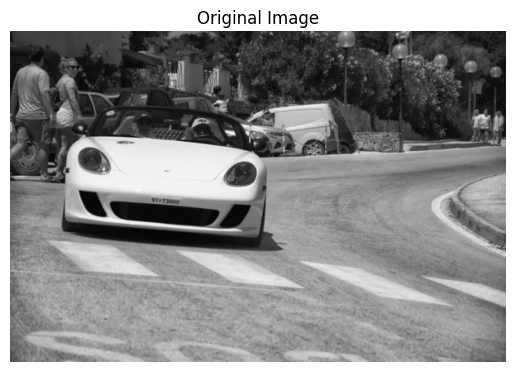

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'carro.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

## ⚙️ Manual 2D Convolution Implementation

In [3]:
def convolve2d(image, kernel):
    h, w = kernel.shape
    pad_h, pad_w = h // 2, w // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+h, j:j+w]
            result[i, j] = np.clip(np.sum(region * kernel), 0, 255)
    return result.astype(np.uint8)

## 🧪 Define and Apply Custom Kernels

In [4]:
# Sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Blur kernel
blur_kernel = np.ones((3, 3)) / 9

# Edge detection kernel (Sobel X)
edge_kernel = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

# Apply each
sharpened = convolve2d(image, sharpen_kernel)
blurred = convolve2d(image, blur_kernel)
edges = convolve2d(image, edge_kernel)

## 📊 Compare Results of Custom Filters

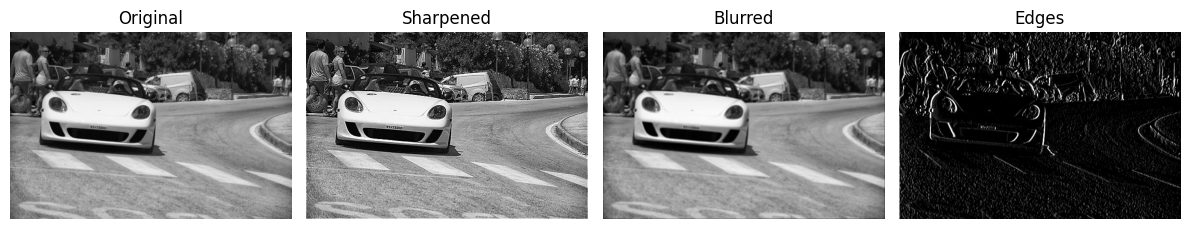

In [5]:
titles = ['Original', 'Sharpened', 'Blurred', 'Edges']
images = [image, sharpened, blurred, edges]

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 🔁 Compare with OpenCV's filter2D

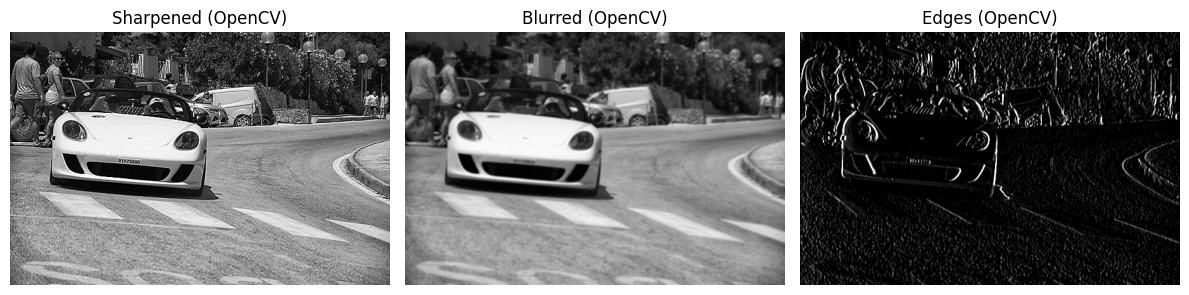

In [6]:
opencv_sharpen = cv2.filter2D(image, -1, sharpen_kernel)
opencv_blur = cv2.filter2D(image, -1, blur_kernel)
opencv_edges = cv2.filter2D(image, -1, edge_kernel)

titles = ['Sharpened (OpenCV)', 'Blurred (OpenCV)', 'Edges (OpenCV)']
images = [opencv_sharpen, opencv_blur, opencv_edges]

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

## 📦 Code to generate the GIF

In [12]:
# Store images and titles
frames = [
    ("Original", image),
    ("Sharpened (Manual)", sharpened),
    ("Blurred (Manual)", blurred),
    ("Edges (Manual)", edges),
    ("Sharpened (OpenCV)", opencv_sharpen),
    ("Blurred (OpenCV)", opencv_blur),
    ("Edges (OpenCV)", opencv_edges)
]

# Generate GIF frames
gif_frames = []

for title, img in frames:
    fig, ax = plt.subplots()
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    gif_frame = Image.open(buf)
    gif_frames.append(gif_frame)

# Save as GIF
gif_frames[0].save("filters_comparison.gif", format="GIF",
                   append_images=gif_frames[1:], save_all=True,
                   duration=1200, loop=0)

print("✅ GIF saved as filters_comparison.gif")

✅ GIF saved as filters_comparison.gif
